## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

: 

#### Import the CSV Data as Pandas DataFrame

In [12]:
df = pd.read_csv('Household Income.csv')

#### Show Top 5 Records

In [13]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


#### Preparing X and Y variables

In [14]:
X = df.drop(columns=['Income'],axis=1)

In [15]:
X.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking


In [16]:
y = df['Income']

In [17]:
y

0         72510
1         75462
2         71748
3         74520
4        640210
         ...   
9995      74994
9996      72676
9997    2684820
9998      57955
9999    1131084
Name: Income, Length: 10000, dtype: int64

In [18]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [19]:
X = preprocessor.fit_transform(X)

In [20]:
X.shape

(10000, 33)

In [21]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 33), (2000, 33))

#### Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1820083.0142
- Mean Absolute Error: 1114263.2359
- R2 Score: 0.0130
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1770911.4576
- Mean Absolute Error: 1101948.7670
- R2 Score: 0.0059




C:\Users\Compro\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+15, tolerance: 2.685e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Compro\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Compro\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Compro\anaconda3\Lib\subprocess.py", line 548, 

Lasso
Model performance for Training set
- Root Mean Squared Error: 1820064.2814
- Mean Absolute Error: 1114373.3945
- R2 Score: 0.0130
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1770979.3324
- Mean Absolute Error: 1102166.3826
- R2 Score: 0.0059


Ridge
Model performance for Training set
- Root Mean Squared Error: 1820064.2851
- Mean Absolute Error: 1114380.0019
- R2 Score: 0.0130
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1770977.7533
- Mean Absolute Error: 1102172.6645
- R2 Score: 0.0059


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1562581.6236
- Mean Absolute Error: 869335.7752
- R2 Score: 0.2725
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1871796.1038
- Mean Absolute Error: 1076928.4634
- R2 Score: -0.1105


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Me

### Results

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.020045
0,Linear Regression,0.005938
2,Ridge,0.005864
1,Lasso,0.005862
7,CatBoosting Regressor,-0.005496
3,K-Neighbors Regressor,-0.110546
6,XGBRegressor,-0.144912
8,AdaBoost Regressor,-0.231122
4,Decision Tree,-1.170131


## Random Forest Regressor

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 1.32


## Plot y_pred and y_test

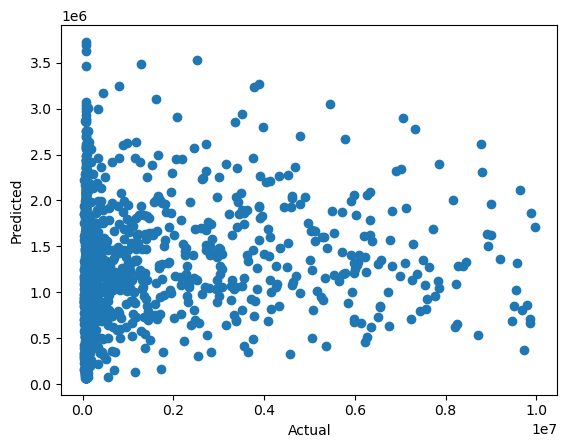

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

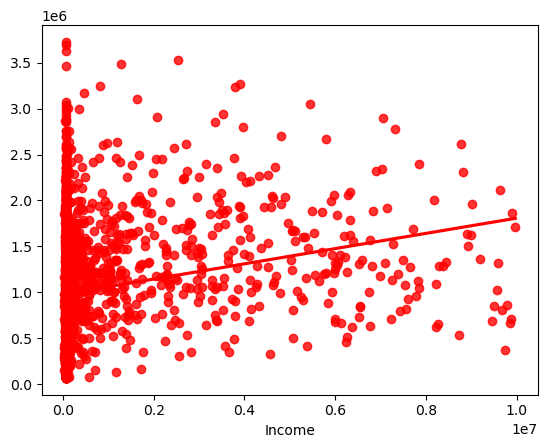

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6252,74742,101872.08,-27130.08
4684,5989527,704896.10,5284630.90
1731,69356,1229005.66,-1159649.66
4742,790523,1940462.90,-1149939.90
4521,9732313,371182.67,9361130.33
...,...,...,...
6412,71150,569256.55,-498106.55
8285,64916,558532.19,-493616.19
7853,147809,1554477.84,-1406668.84
1095,70212,1057734.24,-987522.24
